## Bbufo Stacks

1 family,

40 adults (20 M, 20 F)

In [255]:
%matplotlib inline
from operator import itemgetter
from __future__ import division
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [225]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


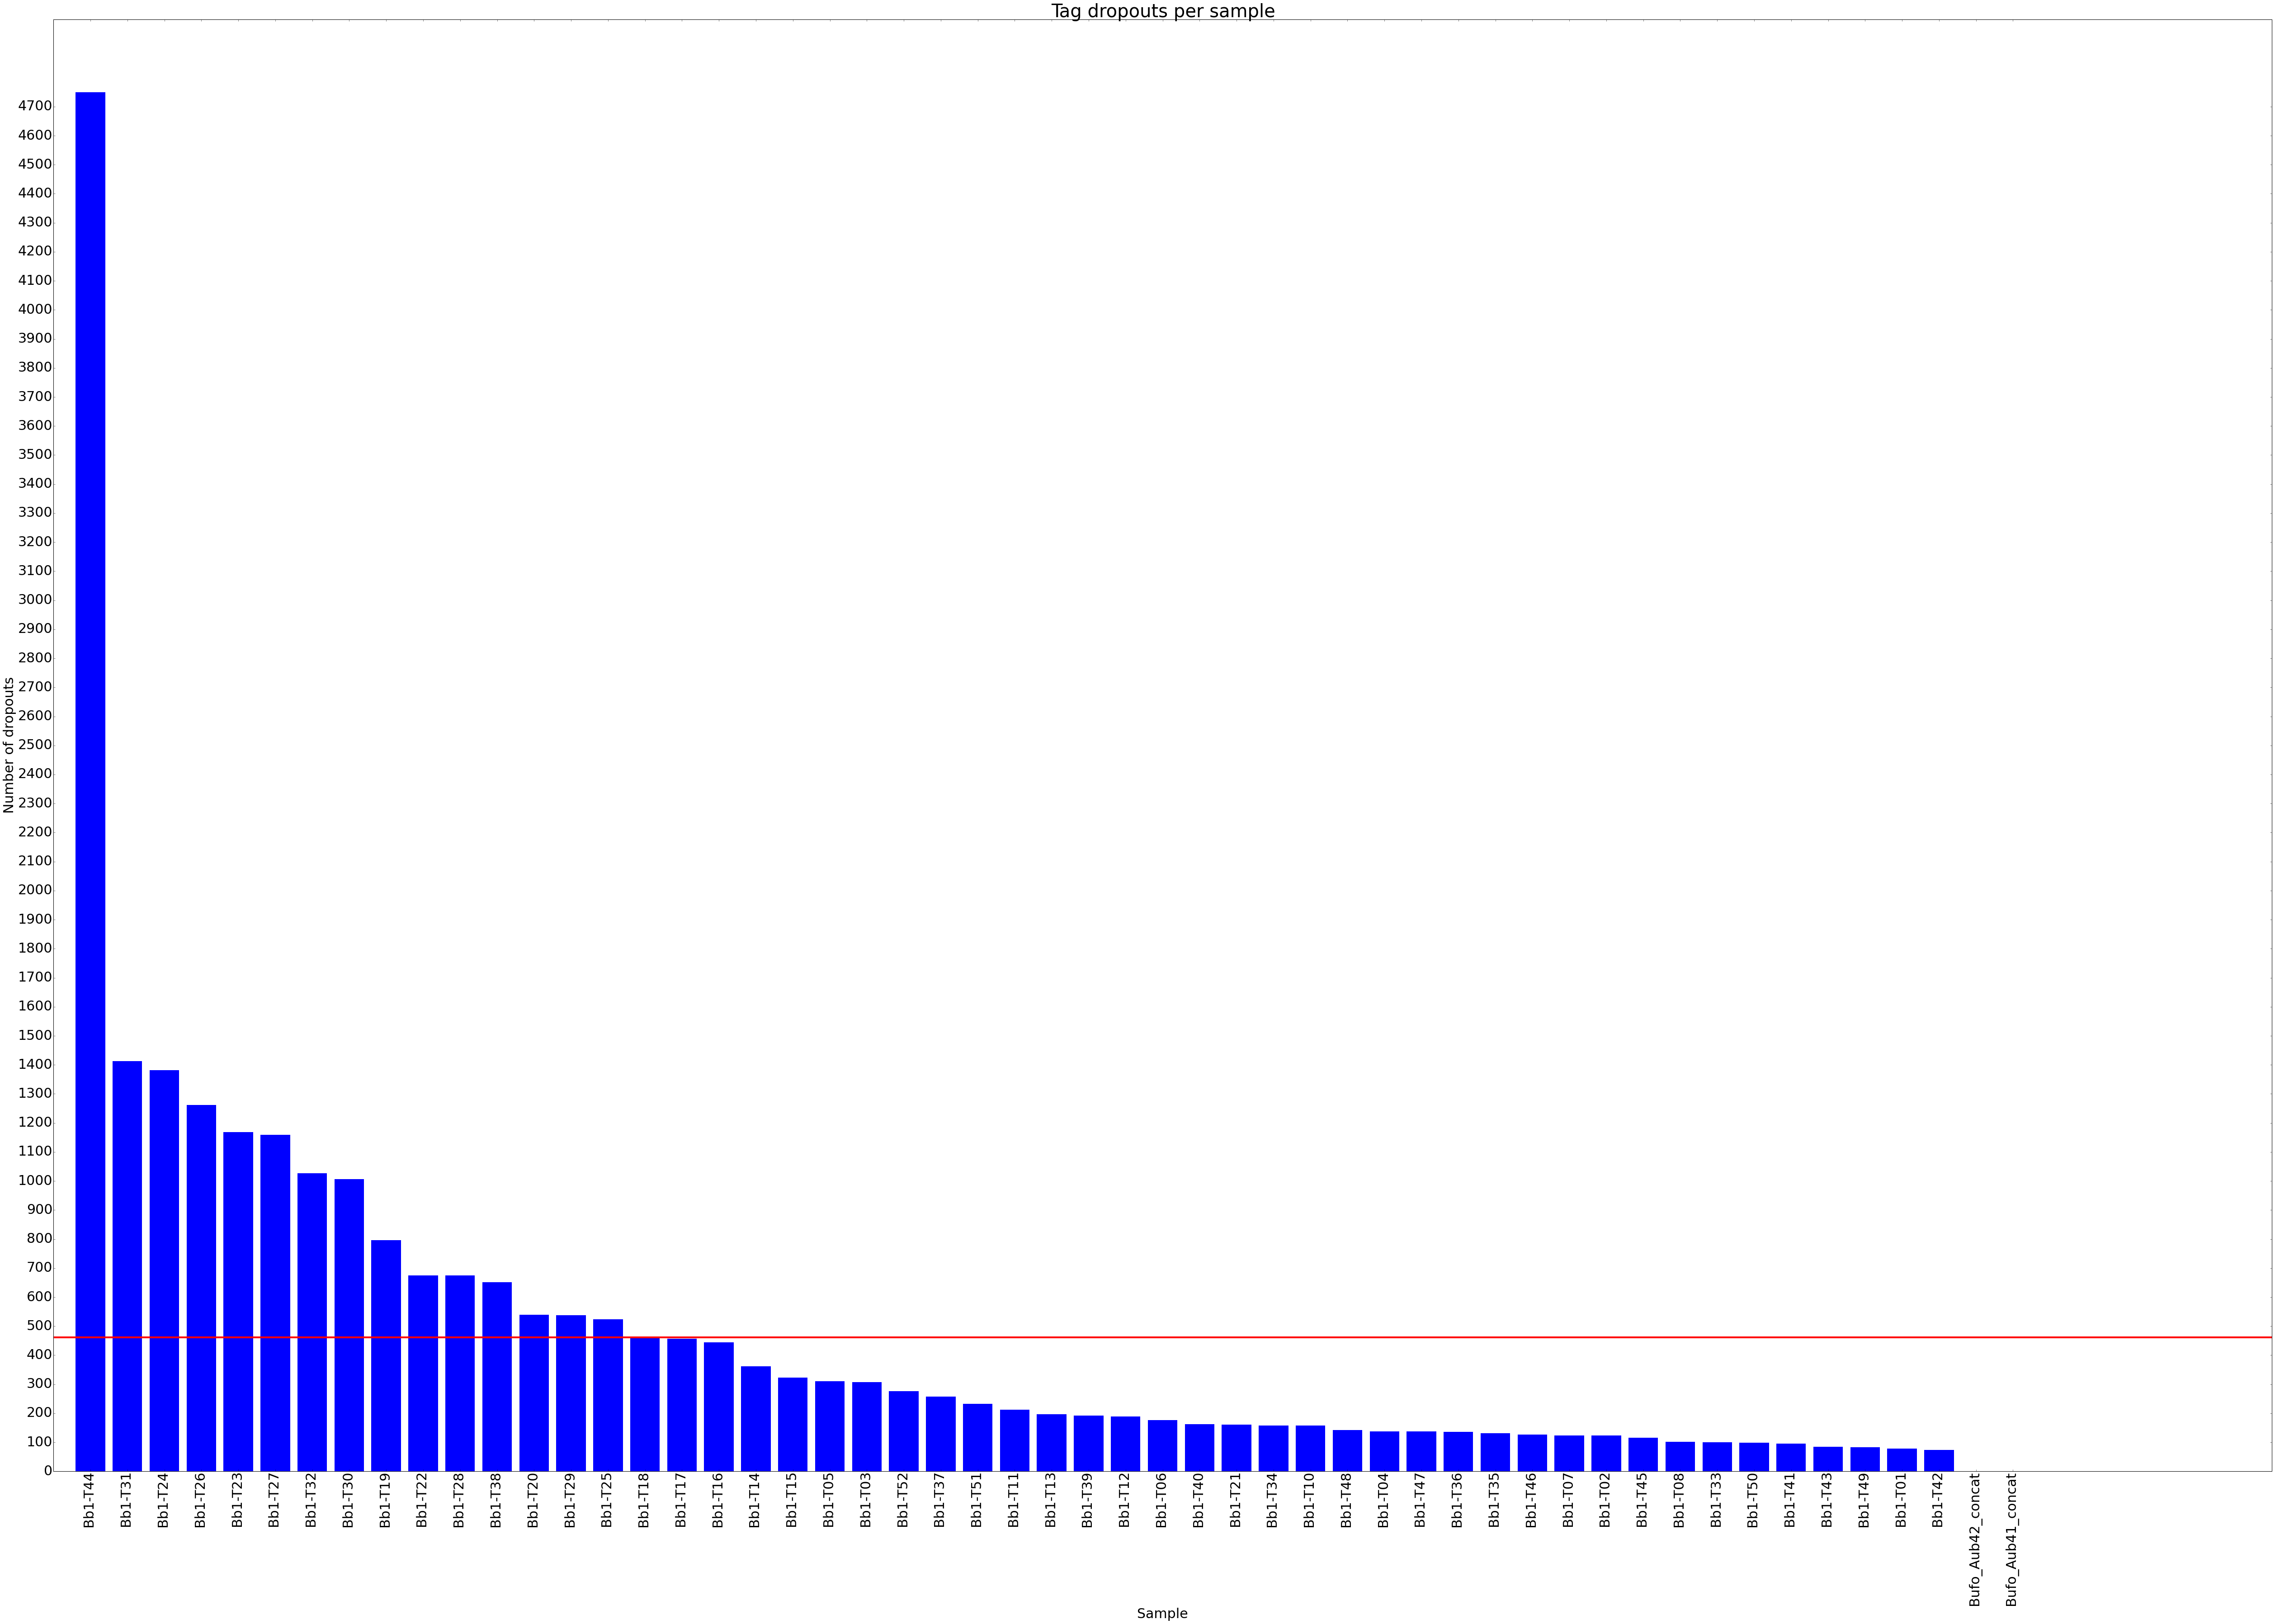

Outputs written to:
/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//blacklist.txt


In [4]:
wd = "/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

So a couple of bad samples, but still very few dropouts and only two bad samples are unlikely to have a big impact on the number of loci. Continue as is for now. 

### Now run a PCA to look at the structure in the data . . . 

In [6]:
%%bash

wd=/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 15k variants complete.
/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam//batch_1_altered_adegenet_plink-temporary.fam
written.
15575 variants loaded from .bim file.
53 people (0 males, 0 females, 53 ambiguous) loaded from .fam.
A

In [8]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("../popmap_fam.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


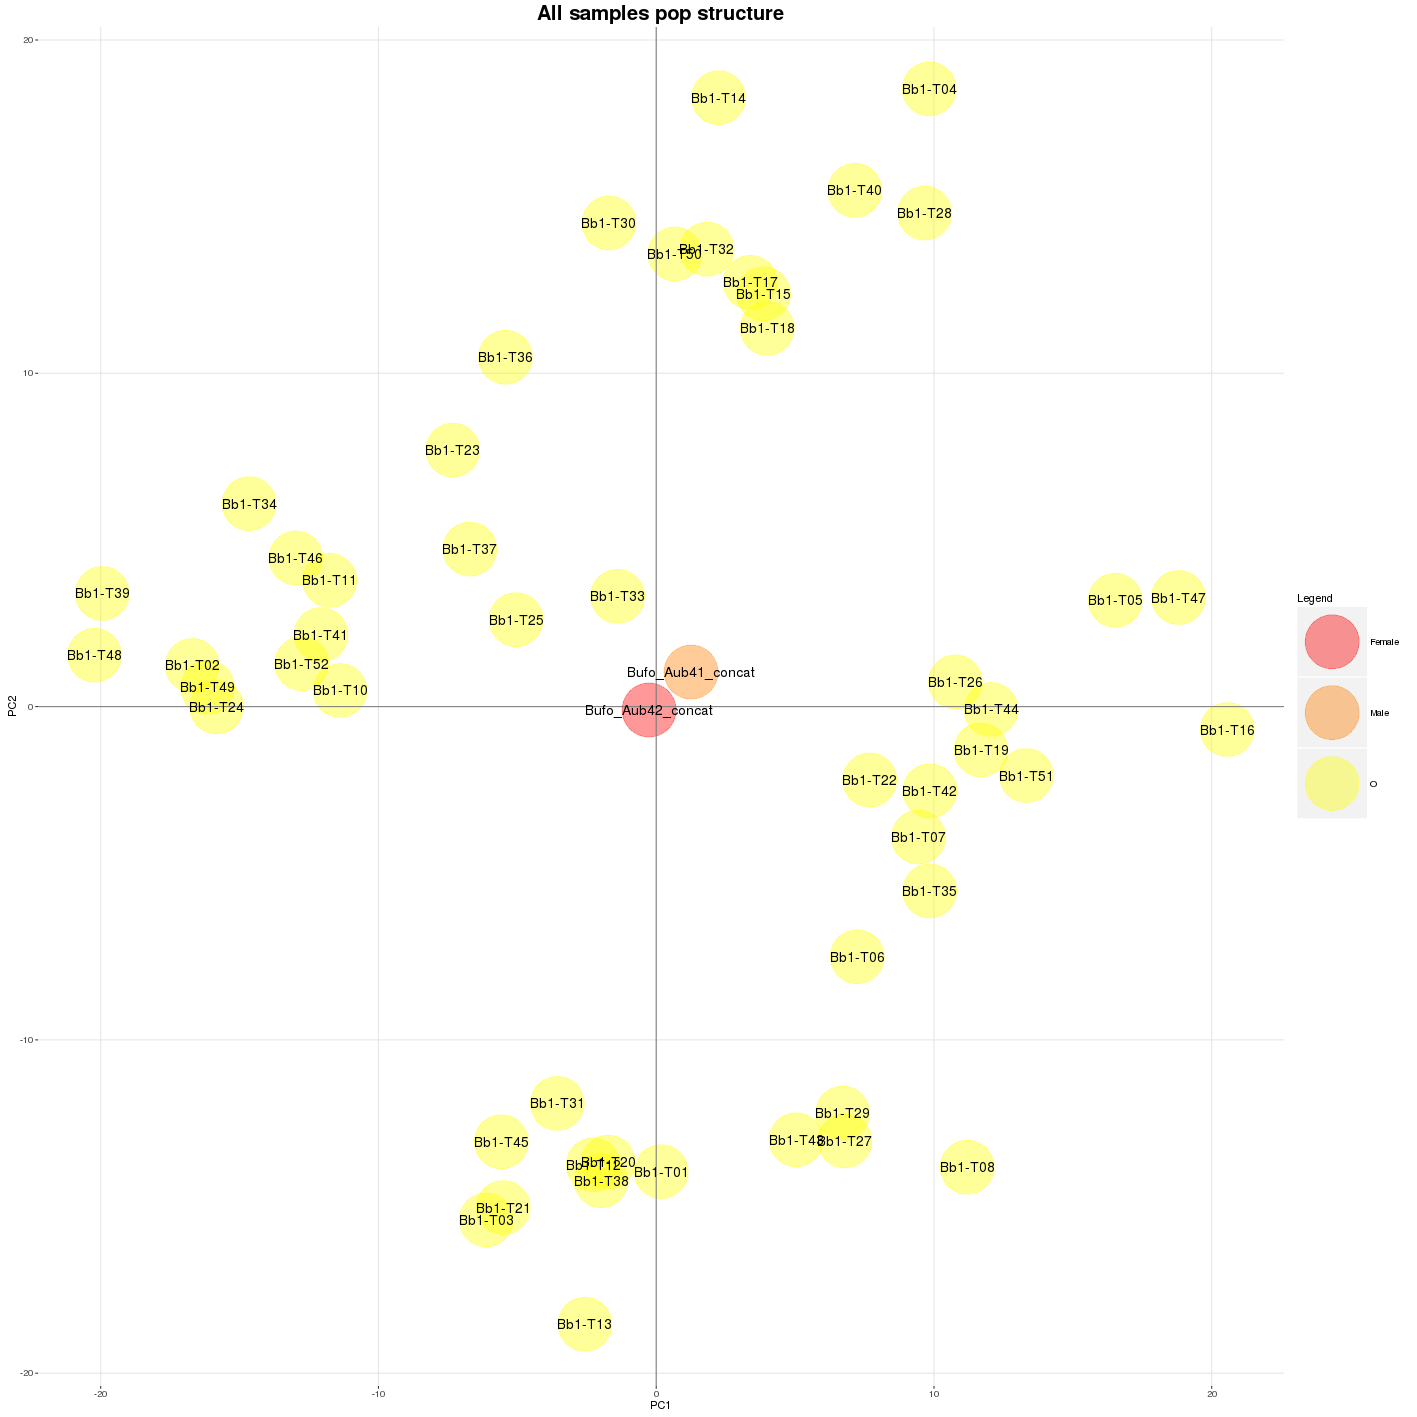

In [9]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "All samples pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

So there is, potentially some sex-structure in here - two clear groups of offspring. But I don't know which are which. 

So there is structure, there seems to be quite a bit in the portuguese population too.

Now I will look at the amount of structure in just the northen Spanish populations without the family.

In [11]:
%%bash

wd=/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_altered_adegenet_plink.raw  $wd/batch_1_heatmap_input


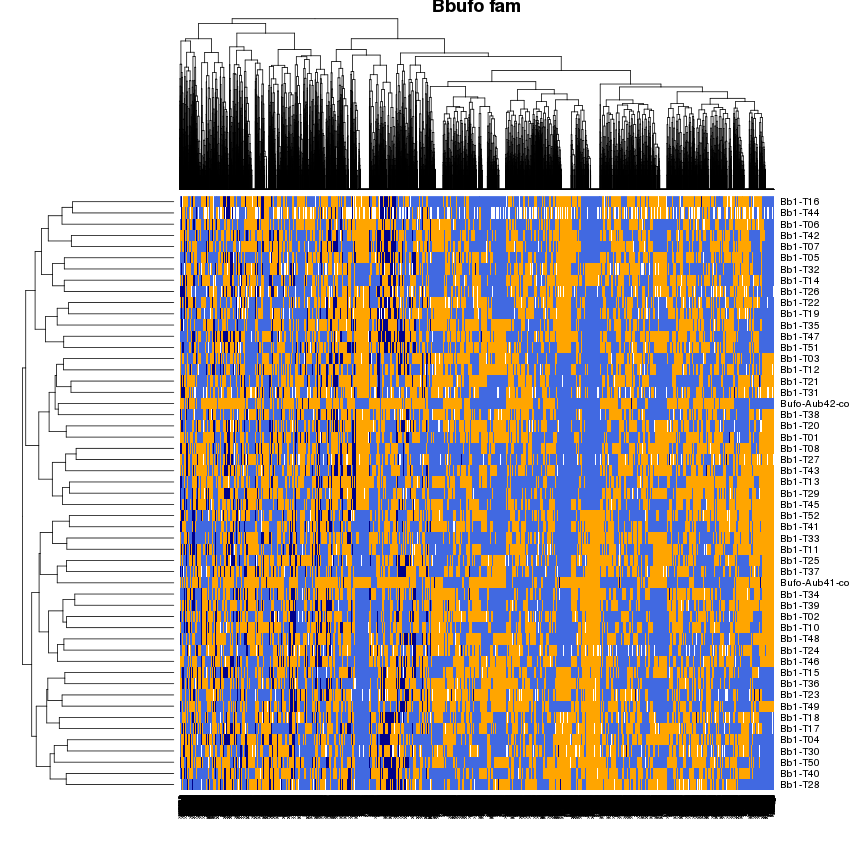

In [109]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/batch_1_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

#png("/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/Family_heatmap.png")
heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Bbufo fam")
#dev.off()

In [178]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Dufresnes/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Dufresnes/Sex_ID_info_adults.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 16969
Number of samples = 42
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 16968
Number of putative X linked snps = 0
Number of putative X linked tags = 0
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


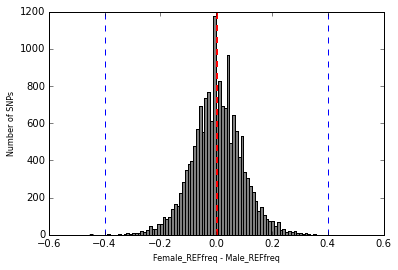


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 16969
Number of samples = 42
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 16968
Number of putative X linked snps = 0
Number of putative X linked tags = 0
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 21
Number of males: 21
Number of Putative Y linked tags: 2
Number of Putative W linked tags: 3

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Dufresnes

 ## After merging tags accross methods ## 

Final number of XY tags = 2
Final number of ZW tags = 3


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:52: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")
/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:56: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


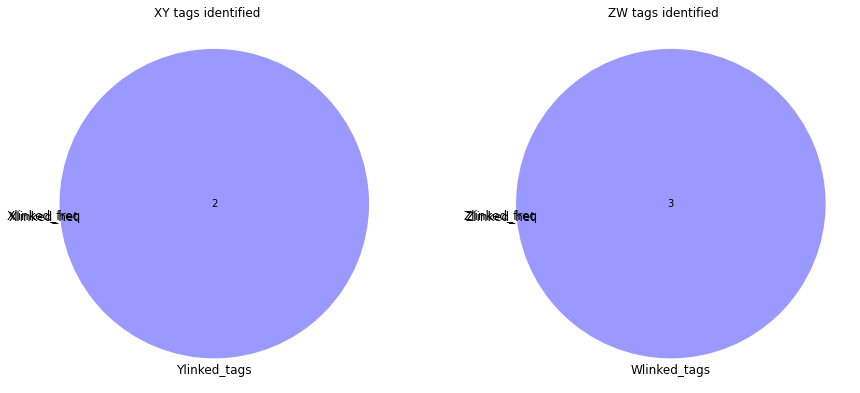

In [179]:
N_Spain_XYset, N_Spain_ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

So there are no markers confidently identified here. . . . I re-ran stacks, removing a couple of bad samples and relaxing filtering parameters slightly . . . so now will test again

In [201]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Dufresnes/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults_relaxed/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Dufresnes/Sex_ID_info_adults_relaxed.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.75 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.75 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


In [202]:
Bufo_adults_relaxed_XY, Bufo_adults_relaxed_ZW = MISC.Super_SLM_finder(Parameter_dict, "001")


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 18
Number of males: 21
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 1

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Dufresnes

 ## After merging tags accross methods ## 

Final number of XY tags = 0
Final number of ZW tags = 1


In [196]:
Bufo_adults_relaxed_ZW

{'142147_13219633'}

In [19]:
%%bash

wd=/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 16k variants complete.
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_altered_adegenet_plink-temporary.fam
written.
16969 variants loaded from .bim file.
42 people (0 males, 0 females, 42 ambiguous) l

In [20]:
%%bash

wd=/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_altered_adegenet_plink.raw  $wd/batch_1_heatmap_input


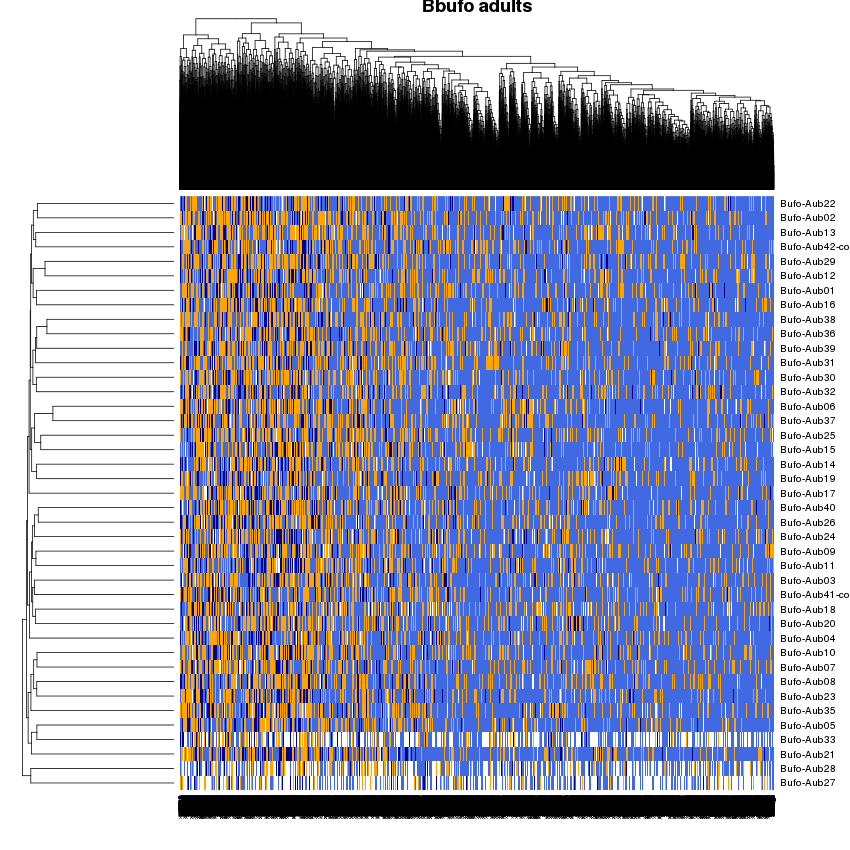

In [22]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/batch_1_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Bbufo adults")


### Nope still nothing . . . . So I will go down a different route - I will make a linkage map . . . and then see if I can locate the loci that look sex linked in the family. They should fall onto one LG. If so I can then plot the adults at these loci and see whats going on . . . 

### Now, how about finding loci that are het in the father of the family and hom in the mother. And see if this reduces the Auto signal among the other adults. . . 

In [111]:
import vcf

Male = "Bufo_Aub41_concat"
Female = "Bufo_Aub42_concat"


vcf_path = "/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/batch_1.vcf.altered"

myVCF = vcf.Reader(open(vcf_path, 'r'))

locus_counter = 0
SL_locus_counter = 0 

whitelist = []

for record in myVCF:
    locus_counter += 1
    
    het_het = False
    hom_hom = False

    for sample in record.samples:
        
        if sample.sample == Male: ## for the female genotype at this locus
            if sample.is_het: ## If the female is heterozygous
                het_het = True

    if het_het == True:
        for sample in record.samples:

            if sample.sample == Female: ## for the female genotype at this locus
                if sample['GT'] == "1/1" or sample['GT'] == "0/0": ## If the female is heterozygous
                    hom_hom = True

    if all([het_het == True, hom_hom == True]):
        #print record
        
        whitelist.append(record.ID)
        
        SL_locus_counter += 1

print locus_counter, SL_locus_counter
    



16969 3051


In [114]:
MISC.filter_vcf_tag_ID_only("/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/batch_1.vcf", whitelist, "batch_1_whitelisted.vcf")

In [116]:
%%bash

wd=/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1_whitelisted.vcf > $wd/batch_1_whitelisted_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_whitelisted_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_whitelisted_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_whitelisted_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_whitelisted_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_whitelisted_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 3k variants complete.
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_whitelisted_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_whitelisted_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_whitelisted_adegenet_plink-temporary.fam
written.
3849 variants loaded from .bim file.
42 people (0 males, 0 fe

In [117]:
%%bash

wd=/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_whitelisted_adegenet_plink.raw  $wd/batch_1_heatmap_input


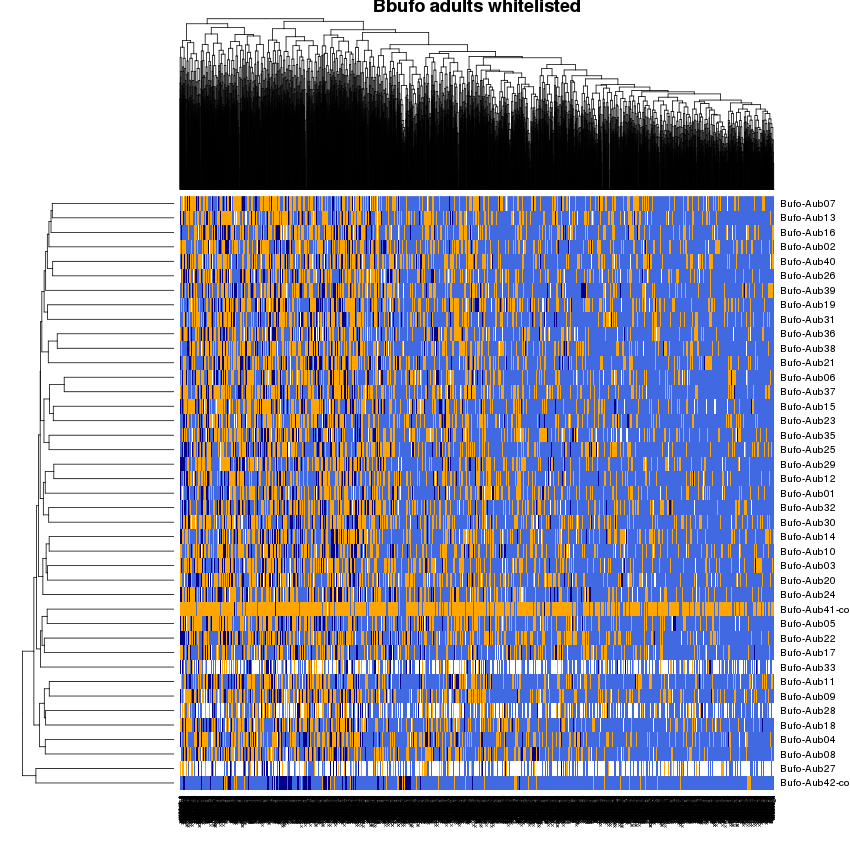

In [119]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/batch_1_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Bbufo adults whitelisted")


### Nope still no luck!

Linkage map was made in MSTmap for the male, and contained about 5500 markers and found 11 lGs as expected. The female map could not resolve linkage groups.

So next I will assign a sex to the offspring of the family - note the sex I assign is somewhat arbitrary at this point - it could be XY or ZW based, but in either case, the set of loci which look sex linked should still map to the same linkage group. Hopefully some of them are in the map. . . . lets have a look! 

I have assigned the sexes based on the two blocks of samples found in the segregation patterns in the loci. I have used the father and mother to assign sexes as if it were an XY system. This could be just as easily done for a ZW but would be the exact opposite expectation, so at this point it doesn't really matter which way round I assign them. 

What I am looking for is a category of markers (a,b,c or d see schematic), which has much higher number that the rest. This should tell me which system it is. 

### Sex assignment 1 (XY looking for a-loci)

a loci should be identified as XY linked

In [19]:
## Analyses parameters

vcf_path = "/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/batch_1.vcf"
popmap_path = "/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/popmap_fam_sex_assigned.txt"
catalog_file = "/home/djeffrie/Data/RADseq/Dufresnes/batch_1.catalog.tags.tsv.gz"
offspring_presence_threshold = 0.9   # 90% of offspring must have data for a given locus
medelian_cut_off = 0.75   # 75% mendelian segregation frequency threshold
min_thresh_for_heterozygous_heterogametic_sex = 0.9  # 75% of the heterogametic sex must be heterozygous
min_thresh_for_homozygous_homogametic_sex = 0.9  # 90% of the homogametic sex must be homozygous


a_loci, others1 = MISC.SL_markers_from_sexed_fam(vcf_path,
                                     popmap_path, 
                                     catalog_file, 
                                     offspring_presence_threshold, 
                                     medelian_cut_off, 
                                     min_thresh_for_heterozygous_heterogametic_sex, 
                                     min_thresh_for_homozygous_homogametic_sex)

Number of good loci = 11005

N loci suitable for XY testing: 5516
N XY test loci with enough heterozygous males: 326
N loci that fit the specified XY criteria: 192

N loci suitable for ZW testing: 5489
N ZW test loci with enough heterozygous females: 5488
N loci that fit the specified ZW criteria: 0


### Sex assignment 2 (ZW looking for b-loci)

b loci should be identified as XY linked

In [20]:
## Analyses parameters

vcf_path = "/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/batch_1.vcf"
popmap_path = "/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/popmap_fam_sex_assigned_2.txt"
catalog_file = "/home/djeffrie/Data/RADseq/Dufresnes/batch_1.catalog.tags.tsv.gz"
offspring_presence_threshold = 0.9   # 90% of offspring must have data for a given locus
medelian_cut_off = 0.75   # 75% mendelian segregation frequency threshold
min_thresh_for_heterozygous_heterogametic_sex = 0.9  # 75% of the heterogametic sex must be heterozygous
min_thresh_for_homozygous_homogametic_sex = 0.9  # 90% of the homogametic sex must be homozygous


b_loci, others2 = MISC.SL_markers_from_sexed_fam(vcf_path,
                                     popmap_path, 
                                     catalog_file, 
                                     offspring_presence_threshold, 
                                     medelian_cut_off, 
                                     min_thresh_for_heterozygous_heterogametic_sex, 
                                     min_thresh_for_homozygous_homogametic_sex)

Number of good loci = 11005

N loci suitable for XY testing: 5516
N XY test loci with enough heterozygous males: 137
N loci that fit the specified XY criteria: 123

N loci suitable for ZW testing: 5489
N ZW test loci with enough heterozygous females: 5489
N loci that fit the specified ZW criteria: 1


### Sex assignment 3 (ZW looking for b-loci)

c and d loci should be identified as XY linked and ZW linked

In [28]:
## Analyses parameters

vcf_path = "/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/batch_1.vcf"
popmap_path = "/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/popmap_fam_sex_assigned_3.txt"
catalog_file = "/home/djeffrie/Data/RADseq/Dufresnes/batch_1.catalog.tags.tsv.gz"
offspring_presence_threshold = 0.9   # 90% of offspring must have data for a given locus
medelian_cut_off = 0.75   # 75% mendelian segregation frequency threshold
min_thresh_for_heterozygous_heterogametic_sex = 0.9  # 75% of the heterogametic sex must be heterozygous
min_thresh_for_homozygous_homogametic_sex = 0.9  # 90% of the homogametic sex must be homozygous


others3, c_loci = MISC.SL_markers_from_sexed_fam(vcf_path,
                                     popmap_path, 
                                     catalog_file, 
                                     offspring_presence_threshold, 
                                     medelian_cut_off, 
                                     min_thresh_for_heterozygous_heterogametic_sex, 
                                     min_thresh_for_homozygous_homogametic_sex)

Number of good loci = 11005

N loci suitable for XY testing: 5489
N XY test loci with enough heterozygous males: 2
N loci that fit the specified XY criteria: 0

N loci suitable for ZW testing: 5516
N ZW test loci with enough heterozygous females: 5268
N loci that fit the specified ZW criteria: 161


In [34]:
c_loci = others3

### Ok that didn't work . . .so I don't know whats going on there. But I at least have a set of loci that should map to the same LG. . . . 

Will now map these to the LM then and see if they all map to the same LG. If so I can use them to plot the adults with and see if I get some sex linked signal there.

In [24]:
Male_map_poitions = open("/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/Male_map_positions_p_1e07.txt", 'r').readlines()

LG_dict = {}


for i in Male_map_poitions[1:]:
    LG = i.split()[0]
    
    if not LG in LG_dict:
        LG_dict[LG] = {}
        LG_dict[LG]["snps"] = []
        LG_dict[LG]["tags"] = []
        
    if "compli" in i.split()[1]:
        snp_ID = "_".join(i.split()[1].split("_")[1:3])
        tag_ID = i.split()[1].split("_")[1]
    else:
        snp_ID = i.split()[1]
        tag_ID = i.split()[1].split("_")[0]
    
    Pos = i.split()[2]
    
    LG_dict[LG]["snps"].append(snp_ID)
    LG_dict[LG]["tags"].append(tag_ID)

In [35]:
LG_hits_a = []
LG_hits_b = []
LG_hits_c = []

for snp_ID in a_loci:
    for LG in LG_dict:
        if snp_ID in LG_dict[LG]["snps"]:
            LG_hits_a.append(LG)
            
for snp_ID in b_loci:
    for LG in LG_dict:
        if snp_ID in LG_dict[LG]["snps"]:
            LG_hits_b.append(LG)
            
for snp_ID in c_loci:
    for LG in LG_dict:
        if snp_ID in LG_dict[LG]["snps"]:
            LG_hits_c.append(LG)

In [38]:
from collections import Counter

print Counter(LG_hits_a)
print Counter(LG_hits_b)
print Counter(LG_hits_c)


Counter({'L12': 192})
Counter({'L12': 123})
Counter({'L16': 161})


### So . . . . . the heatmap isn't giving me sex-linked markers, just linked markers that happen to be heterozygous in one and homozygous in another. . . So, although there is a block that is larger and splits the mother, father and offspring apart, this is not necassarily the sex chromosome. This is why linkage groups do not match up.  .  .

So the only way this would be useful is if I could assume that the sex-linked region is the most heterozygous/larges linkage block in the genome. Which is probably not an assumption I can make. . . 

So whats the next move. . . . 

I think plot a PCA for the adults using loci from each linkage group separately. . . . Do this tomorrow. 

In [102]:
LG = "L8"

MISC.filter_vcf_tag_ID_only("/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/batch_1.vcf", LG_dict[LG]["tags"], "batch_1_%s.vcf" % LG)

In [103]:
%%bash

wd=/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/  ## just change this line
LG=L8

## XY linked data only
sed 's/_/-/g' $wd/batch_1_${LG}.vcf > $wd/batch_1_${LG}_altered.vcf   ## Change the header (plink can be fussy)

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_${LG}_altered.vcf --recode A --allow-extra-chr -out $wd/batch_1_${LG}_plink ## convert to plink format


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_L8_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_L8_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_L8_altered.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_L8_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_L8_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults//batch_1_L8_plink-temporary.fam
written.
94 variants loaded from .bim file.
42 people (0 males, 0 females, 42 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/

In [104]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/") 

## Sex linked SNPs only 
L8_data <- read.PLINK('./batch_1_L8_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap_adults.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca11<- glPca(L8_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



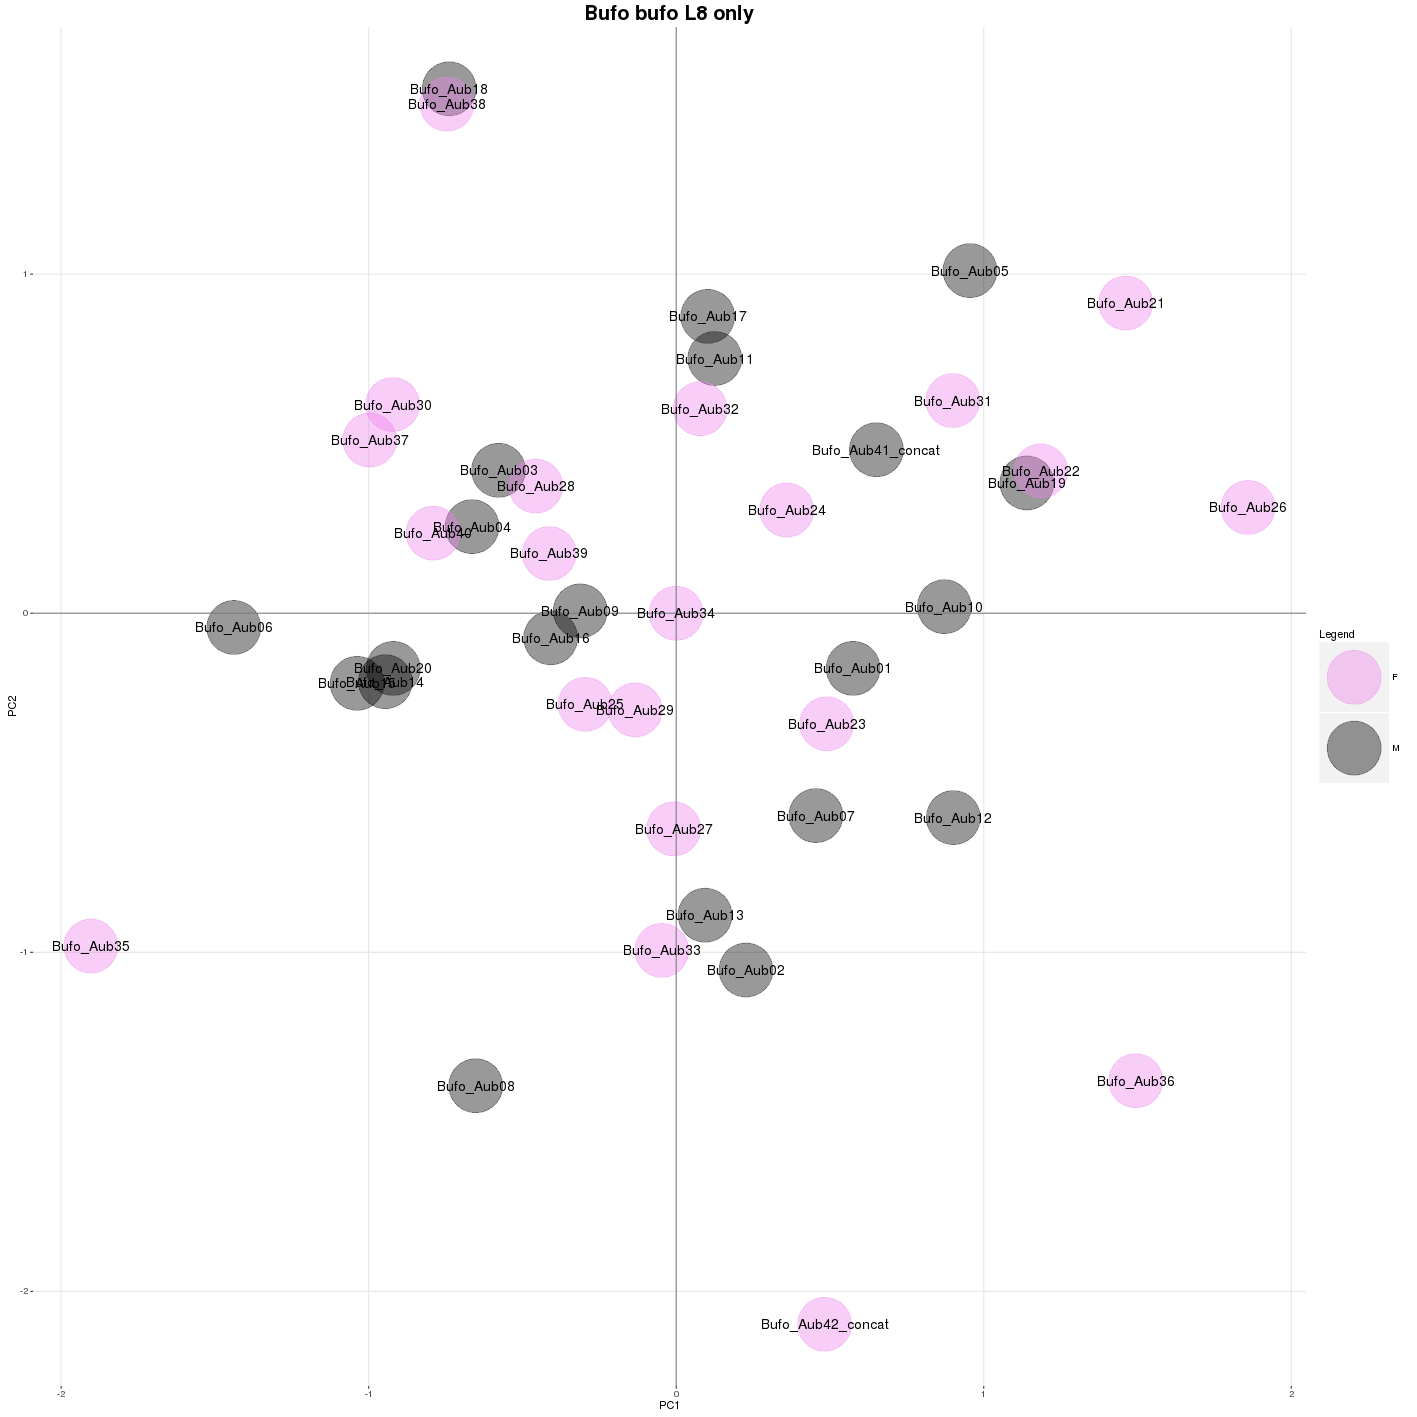

In [105]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca11,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "Bufo bufo L8 only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black", "green", "blue"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

In [106]:
%%bash

wd=/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_L16_plink.raw  $wd/batch_1_L16_heatmap_input


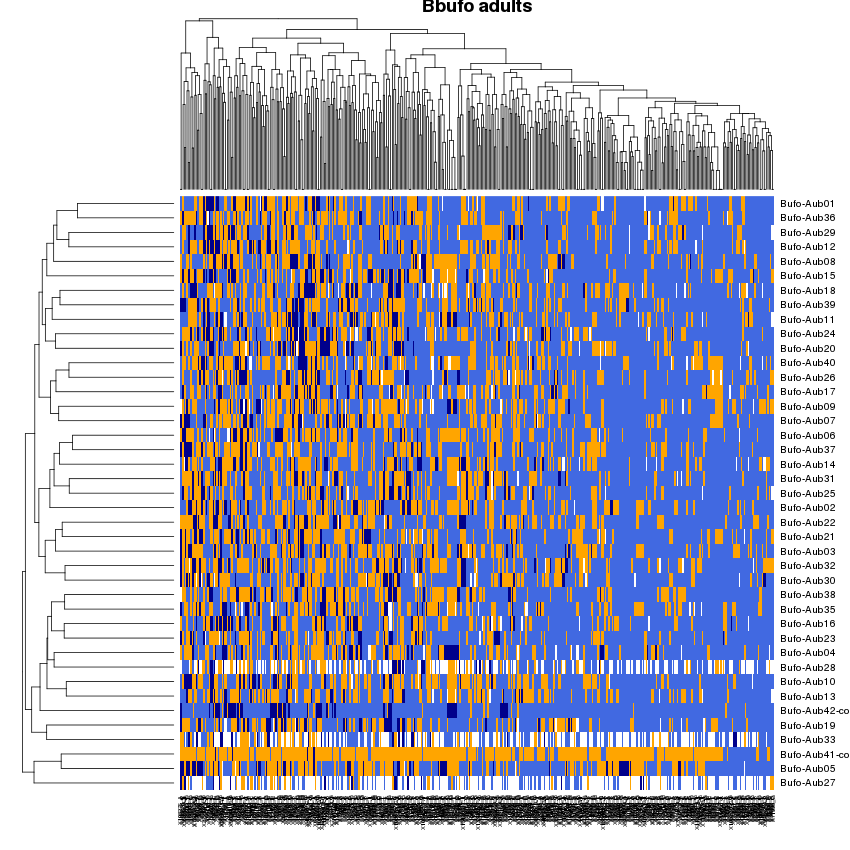

In [108]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults/batch_1_L16_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Bbufo adults")


### Made another linkage map, this time in LepMap.

I will now plot the number of markers in the linkage groups of each sex, against their lenght. If a sex chromosome is sufficiently diverged, there should be a linkage group that has higher SNPs/length ratio, and so this should fall out on the plot. . . . 

In [132]:
lepmap_map_male = open("/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/Lepmap/MAP_LOD_8_js_LOD_7_ordered1_male_gen_mapp.txt", 'r').readlines()
lepmap_map_female = open("/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/Lepmap/MAP_LOD_8_js_LOD_7_ordered1_female_gen_mapp.txt", 'r').readlines()

LM_dict = {}
LM_dict["Male"] = {}
LM_dict["Female"] = {}

for i in lepmap_map_male[1:]:
    if i.split()[1] not in LM_dict["Male"]:
        LG = i.split()[1]
        LM_dict["Male"][LG] = {}
        LM_dict["Male"][LG]["N_markers"] = 0

    LM_dict["Male"][LG]["N_markers"] += 1
    LM_dict["Male"][LG]["length"] = i.split()[2]

    
    
for i in lepmap_map_female[1:]:
    if i.split()[1] not in LM_dict["Female"]:
        LG = i.split()[1]
        LM_dict["Female"][LG] = {}
        LM_dict["Female"][LG]["N_markers"] = 0

    LM_dict["Female"][LG]["N_markers"] += 1
    LM_dict["Female"][LG]["length"] = i.split()[2]

        

In [133]:
LM_dict

{'Female': {'1': {'N_markers': 734, 'length': '765.161'},
  '10': {'N_markers': 51, 'length': '83.831'},
  '11': {'N_markers': 56, 'length': '37.155'},
  '2': {'N_markers': 690, 'length': '720.264'},
  '3': {'N_markers': 617, 'length': '613.912'},
  '4': {'N_markers': 513, 'length': '696.674'},
  '5': {'N_markers': 264, 'length': '468.344'},
  '6': {'N_markers': 196, 'length': '142.682'},
  '7': {'N_markers': 183, 'length': '298.334'},
  '8': {'N_markers': 132, 'length': '197.566'},
  '9': {'N_markers': 118, 'length': '102.242'}},
 'Male': {'1': {'N_markers': 734, 'length': '720.034'},
  '10': {'N_markers': 51, 'length': '23.554'},
  '11': {'N_markers': 56, 'length': '44.894'},
  '2': {'N_markers': 690, 'length': '99.831'},
  '3': {'N_markers': 617, 'length': '162.942'},
  '4': {'N_markers': 513, 'length': '255.086'},
  '5': {'N_markers': 264, 'length': '170.851'},
  '6': {'N_markers': 196, 'length': '135.426'},
  '7': {'N_markers': 183, 'length': '220.567'},
  '8': {'N_markers': 132, 

In [161]:
male_N_markers = []
male_lengths = []
female_N_markers = []
female_lengths = []

for LM in range(1,11):
    male_N_markers.append(LM_dict["Male"][str(LM)]["N_markers"])
    male_lengths.append(float(LM_dict["Male"][str(LM)]["length"]))
    female_N_markers.append(LM_dict["Female"][str(LM)]["N_markers"])
    female_lengths.append(float(LM_dict["Female"][str(LM)]["length"]))
    

In [166]:
xs = [x*(max(male_N_markers)/10)  for x in range(0, 10)]
ys = [x*(max(male_lengths)/10)  for x in range(0, 10)]


In [168]:
xs

[0.0,
 73.4,
 146.8,
 220.20000000000002,
 293.6,
 367.0,
 440.40000000000003,
 513.8000000000001,
 587.2,
 660.6]

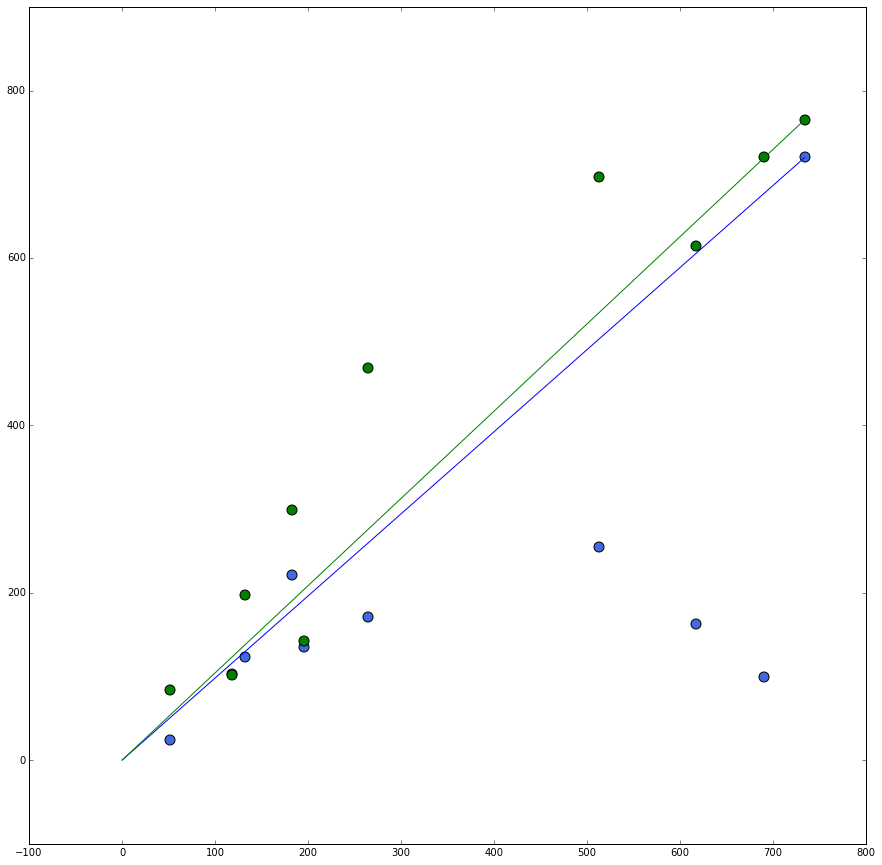

In [177]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (15,15))

xs = [x*(max(male_N_markers)/10)  for x in range(0, 10)] + [max(male_N_markers)]
ys = [x*(max(male_lengths)/10)  for x in range(0, 10)]+ [max(male_lengths)]


plt.scatter(male_N_markers, male_lengths, c = 'royalblue', s = 100)
plt.plot(xs, ys)

         
xs = [x*(max(female_N_markers)/10)  for x in range(0, 10)] + [max(female_N_markers)]
ys = [x*(max(female_lengths)/10)  for x in range(0, 10)]+ [max(female_lengths)]


plt.scatter(female_N_markers, female_lengths, c = 'g', s = 100)
plt.plot(xs, ys)



### So still no reliable signal - althgough there are clearly some interesting things going on with male recombination here - some chromosomes fit the length/N_markers ratio nicely, but three of them show very high numbers of markers, with low recomb rates. These are three of the largest in the female map - so it is clearly a loss of recombination in males that is driving this

One last thing I can think of to try - take all of the markers in the linkage map, take their positions, and plot the Fst between males and female adults along the map. . . . see if there are any outlier regions. 

In [204]:
### First, get the positions of markers from the map.

LG_dict = {}

fem_map = open("/home/djeffrie/Data/RADseq/Dufresnes/Populations_fam/Lepmap/MAP_LOD_8_js_LOD_7_ordered1_female_gen_mapp.txt" ,'r').readlines()

for i in fem_map[1:]:
    LG = i.split()[1]
    marker = i.split()[0]
    pos = float(i.split()[2])
    
    if LG not in LG_dict:
        LG_dict[LG] = {}

    LG_dict[LG][marker] = pos


In [209]:
### Now get the Fstats from the fst file

fsts_dict = {}

fst_file = open("/home/djeffrie/Data/RADseq/Dufresnes/Populations_adults_relaxed/batch_1.fst_M-F.tsv", 'r').readlines()

for locus in fst_file[1:]:
    locus_tag = locus.split()[1]
    locus_pos = locus.split()[5]
    locus_id = "%s_%s" % (locus_tag, locus_pos)
    fst = float(locus.split()[8])
    fishers_P = float(locus.split()[9])
    
    if locus_tag not in fsts_dict:
        fsts_dict[locus_tag] = {}
    fsts_dict[locus_tag][locus_id] = {}
    fsts_dict[locus_tag][locus_id]["fst"] = fst
    fsts_dict[locus_tag][locus_id]["fishers_P"] = fishers_P
    
    




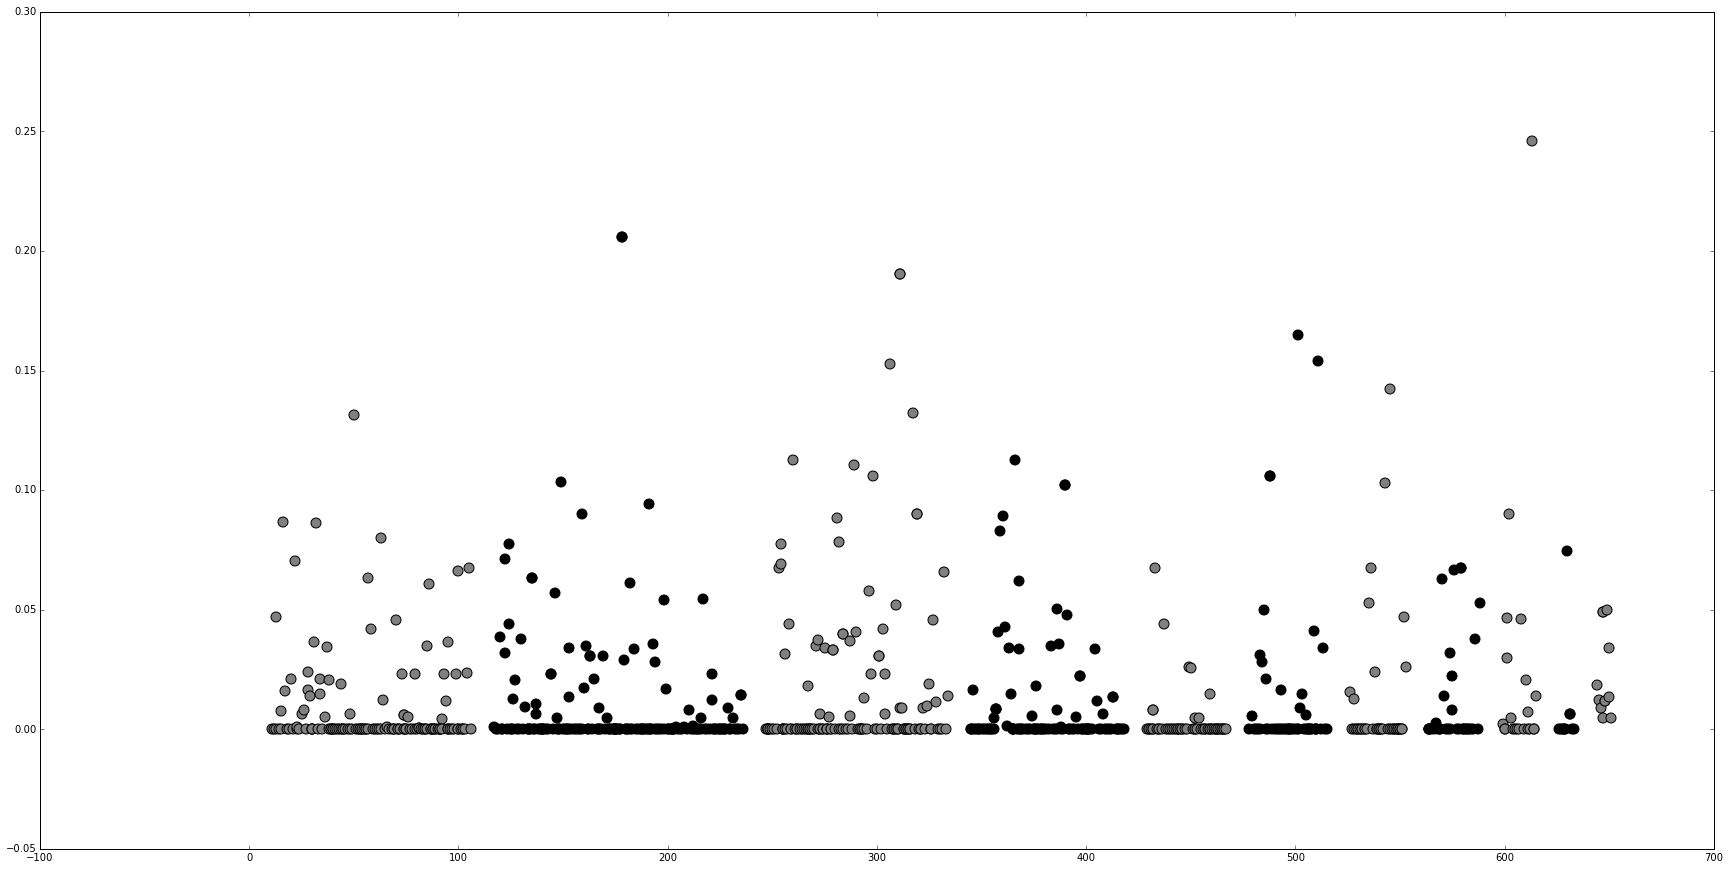

541


In [259]:
fig = plt.figure(figsize = (30,15))

col = "black"

LGs = sorted([int(i) for i in LG_dict.keys()])

LG_pos_accumulator = 0
count = 0

for LG in LGs:
    LG = str(LG)
    oredered_dict = sorted(LG_dict[LG].items(), key=itemgetter(1))
    tag_order = [i for i,j in oredered_dict]
    
    LG_pos_accumulator += 10

    if col == "black":
        col = "grey"
    elif col == "grey":
        col = "black"
    
    
    for tag in tag_order:

        if tag in fsts_dict:
            count +=1
            tag_pos = LG_dict[LG][tag]
            
            LG_pos_accumulator += 1

            for snp in fsts_dict[tag]:
                
                fst = fsts_dict[tag][snp]["fst"]
            
                if fst < 0:
                    fst = 0
            
                plt.scatter(LG_pos_accumulator,fst, c=col, s = 100)

        
plt.show()
        
        
print count
    

### Ok, so again there is no region that seems to stand out as sex-linked, 

This may be a power issue, there are only 100 ish tags on the bigger chromosome and 10's of tags on the smaller ones, so 